In [1]:
from src.ALMApy import get_k2_vs_radius
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

### Some constants

In [2]:
G = 6.67e-11

# Dimensions
R_jupiter = 69.9e6
m_neptune = 1.024e26
R_neptune = 24.6e6
rho_neptune = m_neptune/(4*np.pi/3*R_neptune**3)

# Material properties
rho_air = 1.293
rigidity_air = 1e-7
viscosity_air = 3e-5
rigidity_earth = 1e11
viscosity_earth = 1e21


### Model parameters

In [3]:
no_atm_radii = 100
log_max_atm_radius = 1 #maximum radius = 10**log_max_atm_radius * R_jupiter

no_core_radii = 10
min_core_radius = 0.5*R_neptune
max_core_radius = 5*R_neptune
core_radii = np.linspace(min_core_radius, max_core_radius, no_core_radii)

### Run ALMA upto a giant atmosphere
Takes ~16 s

In [4]:
log_max_atm_radius = 3
atm_radii = (np.logspace(-3,log_max_atm_radius,no_atm_radii)-10**-3)*R_jupiter+min_core_radius
k2 = get_k2_vs_radius(min_core_radius, atm_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth])
giant_atmosphere = {"core_radius": min_core_radius,
                    "radius": atm_radii,
                    "k2": k2}

### Calculate the effective rigidity as a function of $R$
The Love number of a homogeneous sphere is given by
$$
k_2=\frac{3}{2\left(1+\frac{19\mu}{2\rho gR}\right)}
$$
with $\mu$ the rigidity, $\rho$ the density, $g=\frac{4\pi}{3}\rho R$ the surface gravity and $R$ the radius.

For a planet that is made up of two layers: a core with rigidity $\mu_\mathrm{core}$, radius $R_\mathrm{core}$ and density $\rho_\mathrm{core}$ and a fluid atmosphere with density $\rho_\mathrm{atm}$ that extends to the planet's surface at $R$, the mean density is
$$
\overline{\rho}=\frac{M}{\frac{4\pi}{3}R^3}=\frac{\rho_\mathrm{core}R_\mathrm{core}^3+\rho_\mathrm{atm}\left(R^3-R_\mathrm{core}^3\right)}{R^3}
$$
using
$$
x\equiv \frac{R_\mathrm{core}}{R}
$$
this becomes
$$
\overline{\rho}=\frac{\rho_\mathrm{core}+\rho_\mathrm{atm}\left(1-x^3\right)}{x^3}.
$$
Furthermore the surface gravity is
$$
g=\frac{GM}{R^2}=\frac{4\pi}{3}G\overline{\rho}R
$$
which, expressed in $x$, becomes
$$
g = \frac{4\pi}{3}GR_\mathrm{core}\frac{\rho_\mathrm{core}+\rho_\mathrm{atm}\left(1-x^3\right)}{x^2}
$$
In an attempt to find a suitable analytical expression for this planetary model, we also need a suitable expression for the effective rigidity $\overline{\mu}$ which will yield a good approximation of the Love number $k_2$. When calculating the Love number using ALMA, we can calculate this effective rigidity using
$$
\overline{\mu}=\frac{2g\rho R}{19}\left(\frac{3}{2k_2}-1\right).
$$
This effective rigidity is plotted below

In [ ]:
G = 6.67e-11
mu_core = rigidity_earth#1e11
R_core = min_core_radius#2.5e7
rho_core = rho_neptune#1640
rho_atm = rho_air#1.3

def mu(x):
    return mu_core*x**-3#2*mu_core/(1+x**4)#0.4

def g(x):
   return 4*np.pi/3*G*R_core*(rho_core+rho_atm*(x**3-1))/x**2

def rho(x):
    return (rho_core+rho_atm*(x**3-1))/x**3

def k2(x):
    return 3/(2*(1+19*mu(x)/(2*g(x)*rho(x)*x*R_core)))

x_interp = np.logspace(0,6,100)


R_atm = giant_atmosphere["radius"]
k2_values = giant_atmosphere["k2"]

x = R_atm/min_core_radius

mu_sim = 2*g(x)*rho(x)*R_core*x/19*(3/(2*k2_values)-1)


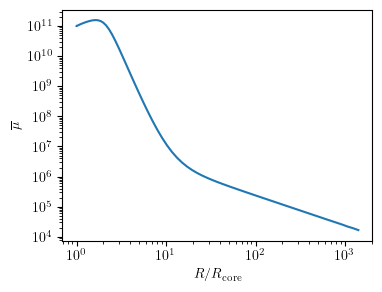

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x[:-10],mu_sim[:-10])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$\\overline{\\mu}$")

plt.show()